In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

### Задача 1: Предсказание растворимости белков

В этой задаче предлагается произвести предсказание растворимости различных белков, используя их физико-химические свойства и белковый состав.

In [ ]:
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1KNyRSO87bQF0NFVwHQD2TynthsoplAZO' -O solubility_data.csv

import urllib.request
urllib.request.urlretrieve("https://docs.google.com/uc?export=download&id=1KNyRSO87bQF0NFVwHQD2TynthsoplAZO", "solubility_data.csv")

('solubility_data.csv', <http.client.HTTPMessage at 0x1ae9b350b50>)

Датасет `solubility_data.csv` загружен за вас, определены `X` и `y`.

In [ ]:
sol = pd.read_csv("./solubility_data.csv", header=0, index_col=0)
sol.head(3)

,solubility,protein_sasa,length,molecular_weight,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,reduced_molar_extinction_coefficient,...,A2,B2,C2,A3,B3,C3,A4,B4,C4,TM
uniprot_id,,,,,,,,,,,,,,,,,,,,,
P32643,78,14538.357720,293,33936.5675,40.259795,5.866034,0.310580,0.208191,0.187713,59360,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0
Q46829,70,19283.018950,470,54516.1438,34.295149,5.655559,0.329787,0.214894,0.225532,111160,...,279,1.1,92.5,0,0.0,0.0,0,0.0,0,0
P65556,19,8407.794332,157,17692.5095,54.505159,4.679577,0.286624,0.165605,0.312102,24980,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0


In [ ]:
X = sol.iloc[:,1:]
y = sol["solubility"]

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 4:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, train_size=0.8, random_state=42)

**Осуществите стандартизацию признаков в выборке**.

In [ ]:
 from sklearn.preprocessing import Normalizer

 normalizer = Normalizer().fit(X_train)
 X_train_norm = normalizer.transform(X_train)
 X_test_norm = normalizer.transform(X_test)

**Импортируйте модель регрессии k-NN и обучите ее (`model.fit`)**.\
*Вопрос*: на какой части выборки происходит обучение: тренировочной или ~тестовой~?

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками RMSE, MAE.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer


def mae_score(*args, **kwargs):
    return - mean_absolute_error(*args, **kwargs)

def mse_score(*args, **kwargs):
    return - mean_squared_error(*args, **kwargs)

mae_scorer = make_scorer(mae_score)
mse_scorer = make_scorer(mse_score)

parameters = {'weights': ['uniform', 'distance'], 'n_neighbors': np.arange(1, 50, 3), 'p': np.linspace(1, 3, 10)}

gridsearch = GridSearchCV(knn, parameters, scoring=mae_scorer)
gridsearch.fit(X_train_norm, y_train)
print(gridsearch.best_params_)
y_pred = gridsearch.predict(X_test_norm)
print('GridSearch on MAE metrics\nBest params MAE: ',mean_absolute_error(y_pred, y_test), '\nAverage approximation MAE', mean_absolute_error(np.ones(len(y_test))*y_test.mean(), y_test))
print('Best params MSE: ', mean_squared_error(y_pred, y_test), '\nAverage approximation MSE', mean_squared_error(np.ones(len(y_test))*y_test.mean(), y_test))

gridsearch = GridSearchCV(knn, parameters, scoring=mse_scorer)
gridsearch.fit(X_train_norm, y_train)
print('\n',gridsearch.best_params_)
y_pred = gridsearch.predict(X_test_norm)
print('GridSearch on MSE metrics\nBest params MAE: ', mean_absolute_error(y_pred, y_test), '\nAverage approximation MAE', mean_absolute_error(np.ones(len(y_test))*y_test.mean(), y_test))
print('Best params MSE: ', mean_squared_error(y_pred, y_test), '\nAverage approximation MSE', mean_squared_error(np.ones(len(y_test))*y_test.mean(), y_test))

{'n_neighbors': 13, 'p': 2.111111111111111, 'weights': 'uniform'}
GridSearch on MAE metrics
Best params MAE:  25.87427626137303 
Average approximation MAE 26.947624002774887
Best params MSE:  924.00318126869 
Average approximation MSE 985.1425598335071

 {'n_neighbors': 19, 'p': 1.4444444444444444, 'weights': 'uniform'}
GridSearch on MSE metrics
Best params MAE:  25.20826259196378 
Average approximation MAE 26.947624002774887
Best params MSE:  895.8942900545079 
Average approximation MSE 985.1425598335071
{'n_neighbors': 13, 'p': 2.111111111111111, 'weights': 'uniform'}
GridSearch on MAE metrics
Best params MAE:  25.87427626137303 
Average approximation MAE 26.947624002774887
Best params MSE:  924.00318126869 
Average approximation MSE 985.1425598335071

 {'n_neighbors': 19, 'p': 1.4444444444444444, 'weights': 'uniform'}
GridSearch on MSE metrics
Best params MAE:  25.20826259196378 
Average approximation MAE 26.947624002774887
Best params MSE:  895.8942900545079 
Average approximation 

Следующая функция строит график зависимости качества на тестовой и тренировочной выборках от параметра модели.\
Измените помеченную строку в функции так, чтобы ее можно было использовать **для построения графика зависимости качества от количества соседей для модели k-NN**.

In [ ]:
from sklearn.metrics import mean_squared_error

def make_qual_chart(X_train, X_test, y_train, y_test, metric=mean_squared_error, limit=50):
    train_quals = np.zeros(limit)
    test_quals = np.zeros(limit)
    param_range = np.arange(1, limit + 1)
    
    for ind, value in enumerate(param_range):
        ### CHANGE THE NEXT LINE!
        model = KNeighborsRegressor(n_neighbors=value)
        # FIT
        model.fit(X_train, y_train)
        # PREDICT
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        # EVALUATE QUALITY
        train_quals[ind] = metric(y_true=y_train, y_pred=y_train_pred)
        test_quals[ind] = metric(y_true=y_test, y_pred=y_test_pred)
    
    baseline = metric(y_true=y_test, y_pred=np.full_like(y_test, y_train.mean()))
    
    # TRACING CHART
    plt.figure(figsize=(10, 7))
    plt.plot(param_range, train_quals, label="Train")
    plt.plot(param_range, test_quals, label="Test")
    baseline_array = np.full_like(param_range, baseline)
    plt.plot(param_range, baseline_array, label="Baseline")
    # plt.axhline(baseline, color="k", ls="--", lw=1.5, label="Baseline")
    plt.legend()
    plt.show()
    return param_range, train_quals, test_quals

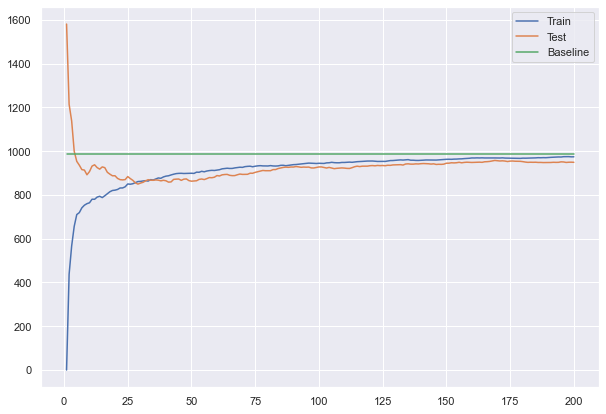

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [ ]:
make_qual_chart(X_train_norm, X_test_norm, y_train, y_test, metric=mean_squared_error, limit=200)

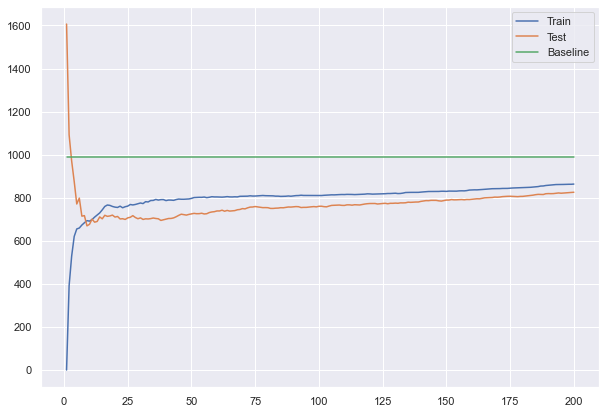

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [ ]:
make_qual_chart(X_train, X_test, y_train, y_test, metric=mean_squared_error, limit=200)

Сделайте вывод о том, **какое число соседей является оптимальным для данной задачи**.

Произошла рандомная магия и вышло так что если тренеровать GridSearchCV на MAE метрике, то лучшая МАЕ оценка оказывается хуже, чем если тренеровать на MSE.
Так или иначе, лучшие параметры: {'n_neighbors': 19, 'p': 1.4444444444444444, 'weights': 'uniform'}

Также можно заметить, что без нормализации можно добиться меньшего MSE, это означает, что не все признаки одинаково важны.  Самым простым способом понять, что важнее всего, будет тренировака на основе этих данных линейной регрессии с последующим исследованием величины весов.

### Задача 2: Обучение на геномных эмбеддингах

В этой задаче предлагается произвести трехклассовую классификацию разных однонуклеотидных замен в ДНК, основываясь на их нейросетевых геномных эмбеддингах.

In [ ]:
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RDTcTnhOcMX4DnJbzdPalWENNFtXi2r8' -O tfs_deepsea.csv

import urllib.request
urllib.request.urlretrieve("https://docs.google.com/uc?export=download&id=1RDTcTnhOcMX4DnJbzdPalWENNFtXi2r8", "tfs_deepsea.csv")

('tfs_deepsea.csv', <http.client.HTTPMessage at 0x1aea2e65190>)

Загрузите датасет `tfs_deepsea.csv`, в качестве `y` используйте колонку `Direction`, в качестве `X` - все колонки, начиная с девятой.

In [ ]:
tfs = pd.read_csv("tfs_deepsea.csv", header=0)
tfs.head(3)

,Chrom,Pos,Ref,Alt,Value,Confidence,Direction,construction,alt@BRCA1@ds_HepG2_normal,alt@CTCF@ds_HCM_normal,...,ref@GATA3@ds_MCF-7_normal,ref@JunD@ds_H1-hESC_None.1,ref@MafK@ds_K562_normal,ref@NRSF@ds_A549_EtOH_0.02pct,ref@Pol2-4H8@ds_GM12891_normal,ref@Pol2@ds_GM12878_None.2,ref@Pol2@ds_GM12878_None.3,ref@Pol2@ds_GM12878_normal,ref@c-Fos@ds_K562_normal,ref@c-Myc@ds_K562_normal
0,9,104195582,G,C,-0.009418,0.001075,0,ALDOB,0.000056,0.000949,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
1,9,104195582,G,T,-0.212088,0.034187,0,ALDOB,0.000051,0.000857,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
2,9,104195700,T,A,0.709840,0.364072,1,ALDOB,0.000089,0.001784,...,0.00292,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891


In [ ]:
y, X = tfs['Direction'], tfs.iloc[:, 9:]
X

,alt@CTCF@ds_HCM_normal,alt@DNase@ds_GM06990_normal,alt@DNase@ds_HRE_normal,alt@ELF1@ds_GM12878_normal,alt@GATA-1@ds_PBDE_normal,alt@GR@ds_A549_DEX_500pM,alt@H3K4me3@ds_NHDF-Ad_normal,alt@H3K9me3@ds_NHLF_normal,alt@NRSF@ds_H1-hESC_normal,alt@POU5F1@ds_H1-hESC_normal,...,ref@GATA3@ds_MCF-7_normal,ref@JunD@ds_H1-hESC_None.1,ref@MafK@ds_K562_normal,ref@NRSF@ds_A549_EtOH_0.02pct,ref@Pol2-4H8@ds_GM12891_normal,ref@Pol2@ds_GM12878_None.2,ref@Pol2@ds_GM12878_None.3,ref@Pol2@ds_GM12878_normal,ref@c-Fos@ds_K562_normal,ref@c-Myc@ds_K562_normal
0,0.000949,0.005588,0.032168,0.000060,0.006015,0.000959,0.002953,0.000253,0.000443,0.000188,...,0.009340,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
1,0.000857,0.006543,0.027380,0.000060,0.005420,0.000793,0.002678,0.000259,0.000400,0.000170,...,0.009340,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
2,0.001784,0.008986,0.161180,0.000086,0.004401,0.001779,0.008086,0.001602,0.001637,0.000405,...,0.002920,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891
3,0.001538,0.008108,0.118170,0.000090,0.004464,0.001636,0.008273,0.001479,0.001845,0.000566,...,0.002920,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891
4,0.001784,0.008564,0.156840,0.000102,0.004632,0.002136,0.009151,0.001432,0.001930,0.000493,...,0.002920,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000450,0.244640,0.006866,0.013020,0.022697,0.000082,0.006869,0.000458,0.002982,0.000692,...,0.000566,0.000237,0.001906,0.001458,0.013105,0.012392,0.018892,0.005048,0.000253,0.011511
996,0.000407,0.240310,0.004726,0.012414,0.018269,0.000072,0.006886,0.000416,0.001421,0.000597,...,0.000566,0.000237,0.001906,0.001458,0.013105,0.012392,0.018892,0.005048,0.000253,0.011511
997,0.000490,0.003300,0.001737,0.000017,0.008573,0.000052,0.002016,0.000637,0.001323,0.000516,...,0.005459,0.000162,0.001430,0.002021,0.000563,0.000065,0.000303,0.000116,0.000067,0.000452
998,0.000499,0.002944,0.001520,0.000017,0.007892,0.000050,0.002075,0.000647,0.001352,0.000560,...,0.005459,0.000162,0.001430,0.002021,0.000563,0.000065,0.000303,0.000116,0.000067,0.000452


**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 4:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [ ]:
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, train_size=0.8, random_state=42)

**Осуществите стандартизацию признаков в выборке**.

In [ ]:
normalizer = Normalizer().fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

**Импортируйте модель логистической регрессии и обучите ее на соответствующей части выборки (`model.fit`)**.

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_norm, y_train)

LogisticRegression()

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками из отчета о классификации (`classification_report`).

In [ ]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test_norm)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.20      0.33        25
           0       0.86      1.00      0.92       167
           1       0.00      0.00      0.00         8

    accuracy                           0.86       200
   macro avg       0.62      0.40      0.42       200
weighted avg       0.84      0.86      0.81       200



C:\Users\OblakoVShtanakh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OblakoVShtanakh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OblakoVShtanakh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Разбейте X и y на тренировочную и тестовую выборки, **так, как указано в ячейке ниже**. Повторите все шаги, чтобы определить качество классификации.

In [ ]:
X_train = X[tfs["construction"] == "ECR11"].values
X_test = X[tfs["construction"] == "ALDOB"].values
y_train = y[tfs["construction"] == "ECR11"].values
y_test = y[tfs["construction"] == "ALDOB"].values

In [ ]:
normalizer = Normalizer().fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_norm, y_train)

y_pred = logreg.predict(X_test_norm)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        94
           0       0.77      0.99      0.87       382
           1       0.50      0.12      0.20        24

    accuracy                           0.77       500
   macro avg       0.42      0.37      0.36       500
weighted avg       0.61      0.77      0.67       500



**Сделайте выводы об изменении качества**.

F1- score для класса "-1" ушел в ноль несмотря на значительное кол-во представленных элементов этого класса (support = 94), в прошлом пункте этого не случилось.   Объясняется это тем, что во втором случае обучение и тестирование проводлиось на данных, характерных для разных сущностей.

Тем не менее, для класса "1" во втором случае метрики качества отчины от нуля. Объяснить такой результат без глубоких копаний сложно, скорее всего это некий случайный артефакт.

Так или иначе, несмотря на значительно меньший размер тренировочной выборки, и в целом непонятное разбиение на трейн и тест, accuracy уменьшился не так сильно как можно было предполагать. Что не отменяет того, что не самым правильным решением будет тренеровать модель на смещенных по классам данных, имея в своем распоряжении более широкую выборку (вряд ли кто-то предказывает курс доллара, тренеруясь на движении звезд).

### Задача 3: Классификация химических веществ

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7' -O bace.csv

#urllib.request.urlretrieve("https://docs.google.com/uc?export=download&id=1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7", "bace.csv")

Датасет [BACE](http://moleculenet.ai/datasets-1) загружен за вас, определены `X`, `y` и `smiles`.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [ ]:
bace = pd.read_csv("./bace.csv", header=0)
bace.head(3)

In [ ]:
X = bace.iloc[:,4:].values
y = bace["Class"].values
smiles = bace["mol"].values

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 3:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [ ]:
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, train_size=0.75, random_state=42)

**Осуществите стандартизацию признаков в выборке**.

In [ ]:
normalizer = Normalizer().fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

**Импортируйте модель логистической регрессии и обучите ее на соответствующей части выборки (`model.fit`)**.

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_norm, y_train)

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками из отчета о классификации (`classification_report`).

In [ ]:
y_pred = logreg.predict(X_test_norm)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68       203
           1       0.62      0.43      0.51       176

    accuracy                           0.61       379
   macro avg       0.61      0.60      0.59       379
weighted avg       0.61      0.61      0.60       379

Функция `fingerprint_train_test_split`, приведенная ниже, осуществляет **разбиение train/test на основании молекулярных "отпечатков" (molecular fingerprints)**. Воспользуйтесь ей, чтобы получить **неслучайное разбиение на train/test** и повторите предыдущие шаги, чтобы оценить качество модели на таком случае.

In [ ]:
!pip install rdkit-pypi

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [ ]:
from rdkit import rdBase

In [ ]:
def _split_fingerprints(fps, size1, size2):
    """This is called by fingerprint_train_test_split to divide a list of fingerprints into
    two groups.
    """
    assert len(fps) == size1 + size2

    # Begin by assigning the first molecule to the first group.

    fp_in_group = [[fps[0]], []]
    indices_in_group = ([0], [])
    remaining_fp = fps[1:]
    remaining_indices = list(range(1, len(fps)))
    max_similarity_to_group = [
        DataStructs.BulkTanimotoSimilarity(fps[0], remaining_fp),
        [0] * len(remaining_fp)
    ]
    while len(remaining_fp) > 0:
    # Decide which group to assign a molecule to.
        group = 0 if len(fp_in_group[0]) / size1 <= len(
            fp_in_group[1]) / size2 else 1

        # Identify the unassigned molecule that is least similar to everything in
        # the other group.

        i = np.argmin(max_similarity_to_group[1 - group])

        # Add it to the group.

        fp = remaining_fp[i]
        fp_in_group[group].append(fp)
        indices_in_group[group].append(remaining_indices[i])

        # Update the data on unassigned molecules.

        similarity = DataStructs.BulkTanimotoSimilarity(fp, remaining_fp)
        max_similarity_to_group[group] = np.delete(
            np.maximum(similarity, max_similarity_to_group[group]), i)
        max_similarity_to_group[1 - group] = np.delete(
            max_similarity_to_group[1 - group], i)
        del remaining_fp[i]
        del remaining_indices[i]
    return indices_in_group

In [ ]:
def fingerprint_train_test_split(X, y, smiles, test_size=0.1):
    assert X.shape[0] == y.shape[0] == smiles.shape[0]
    mols = [Chem.MolFromSmiles(s) for s in smiles]
    fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, 1024) for x in mols]

    # Split into two groups: training set and everything else.

    test_size = int(test_size * len(y))
    train_size = len(y) - test_size
    train_inds, test_inds = _split_fingerprints(fps, train_size, test_size)
    
    X_train = X[train_inds,:]
    X_test = X[test_inds,:]
    y_train = y[train_inds]
    y_test = y[test_inds]
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = fingerprint_train_test_split(X, y, smiles, test_size=0.25)

In [ ]:
normalizer = Normalizer().fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_norm, y_train)

y_pred = logreg.predict(X_test_norm)
print(classification_report(y_test, y_pred))

**Сделайте выводы**: accuracy стал ниже, опять же из-за намеренной разбалансировки трейн и теста. Из этого следует, что сам фингерпринт было бы полезно использовать в классификаторе, так как он на что-то влияет и может помочь с предсказаниями.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)

y_pred = knn.predict(X_test_norm)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       174
           1       0.70      0.71      0.71       204

    accuracy                           0.68       378
   macro avg       0.68      0.68      0.68       378
weighted avg       0.68      0.68      0.68       378



**Доп. вывод**: КНН лучше предсказывает класс, что объясняется тем, что без заморочек с ядрами, логрег просто строит разделяющую гиперповерхность,   

---